In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("../safetronics/Final Dataset.csv")
df.head()

,Patient ID,Heart Rate,Body Temperature,Oxygen Saturation,Age,Gender,Weight,Height (m),HRV,BMI,Risk Category
0,1,60,36.861707,95.702046,37,0,91.541618,1.679351,0.121033,32.459031,0
1,2,63,36.511633,96.689413,77,1,50.704921,1.992546,0.117062,12.771246,0
2,3,63,37.052049,98.508265,68,0,90.316760,1.770228,0.053200,28.821069,1
3,4,99,36.654748,95.011801,41,0,96.006188,1.833629,0.064475,28.554611,0
4,5,69,36.975098,98.623792,25,0,56.020006,1.866419,0.118484,16.081438,0


## K-means Clustering Algorithm

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# select numeric feature although it is
num_cols = df.select_dtypes(include=['number']).columns.to_list()
if 'Patient ID' in num_cols:
    num_cols.remove('Patient ID')
if 'Risk Category' in num_cols:
    num_cols.remove('Risk Category')

In [6]:
num_cols

['Heart Rate',
 'Body Temperature',
 'Oxygen Saturation',
 'Age',
 'Gender',
 'Weight',
 'Height (m)',
 'HRV',
 'BMI']

In [7]:
df_k_mean = df[num_cols]
df_k_mean.head()

,Heart Rate,Body Temperature,Oxygen Saturation,Age,Gender,Weight,Height (m),HRV,BMI
0,60,36.861707,95.702046,37,0,91.541618,1.679351,0.121033,32.459031
1,63,36.511633,96.689413,77,1,50.704921,1.992546,0.117062,12.771246
2,63,37.052049,98.508265,68,0,90.316760,1.770228,0.053200,28.821069
3,99,36.654748,95.011801,41,0,96.006188,1.833629,0.064475,28.554611
4,69,36.975098,98.623792,25,0,56.020006,1.866419,0.118484,16.081438


In [10]:
# handle missing value
df_k_mean.dropna()
scaler_clust = StandardScaler()
X_scaled = scaler_clust.fit_transform(df_k_mean)

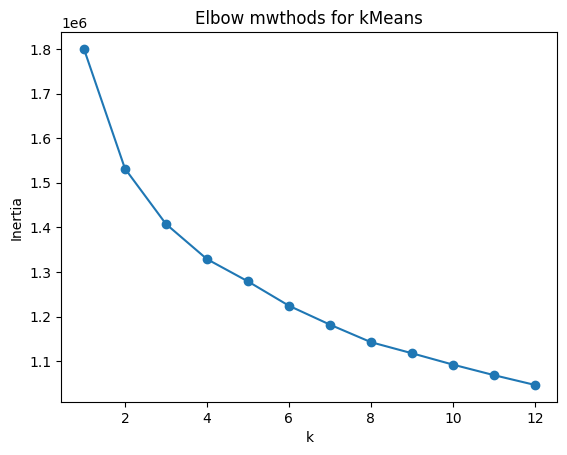

In [15]:
## Elbow method (inertia) to pick K
inertia = []
ks = range(1,13)
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
plt.figure()
plt.plot(ks, inertia, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow mwthods for kMeans')
plt.show()

In [17]:
# silhouetter scores
sil = {}
for k in range(2,5):
    print("k: ", k)
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    sil[k] = silhouette_score(X_scaled, km.labels_)

print("silhouette_scores: ", sil)

k:  2


KeyboardInterrupt: 

In [28]:
k = 3
km = KMeans(n_clusters=k, random_state=42, n_init=20)
labels = km.fit_predict(X_scaled)

In [29]:
labels

array([1, 2, 1, ..., 0, 0, 0], dtype=int32)

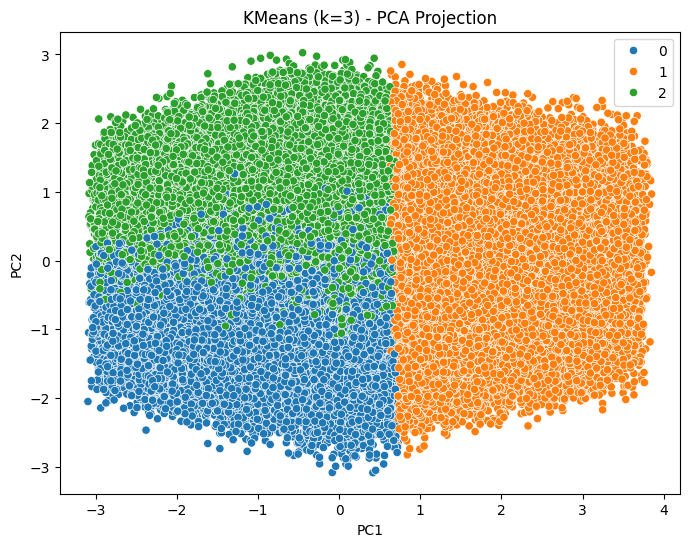

In [30]:
# Visualization 2d
pca = PCA(n_components=2, random_state=42)
proj = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=proj[:,0], y=proj[:,1], hue=labels,palette='tab10', legend='full')
plt.title(f"KMeans (k={k}) - PCA Projection")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

/tmp/ipykernel_6717/1648385563.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


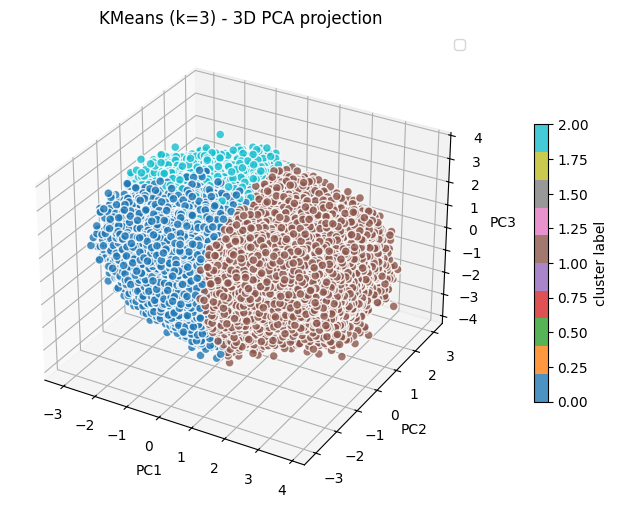

In [33]:
# 3D Visualiztion
from mpl_toolkits.mplot3d import Axes3D
pca_3d = PCA(n_components=3, random_state=42)
proj_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
sc = ax.scatter(
    proj_3d[:,0],
    proj_3d[:,1],
    proj_3d[:,2],
    c=labels,
    cmap='tab10',
    s=40,
    alpha=0.8,
    edgecolor='w'
)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title(f'KMeans (k={k}) - 3D PCA projection')
plt.legend(loc='best')

cbar = plt.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label('cluster label')
plt.show()